In [1]:
import cv2
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def MyModel(input_shape):
    inputs = layers.Input(shape=input_shape)

    net = layers.Conv2D(32, 3, 1, padding='same', activation='relu')(inputs)
    net = layers.Conv2D(32, 3, 1, padding='same', activation='relu')(net)
    net = layers.MaxPooling2D(pool_size=(2,2))(net)
    net = layers.Dropout(0.25)(net)

    net = layers.Conv2D(32, 3, 1, padding='same', activation='relu')(net)
    net = layers.Conv2D(32, 3, 1, padding='same', activation='relu')(net)
    net = layers.MaxPooling2D(pool_size=(2,2))(net)
    net = layers.Dropout(0.25)(net)

    net = layers.Flatten()(net)
    net = layers.Dense(512, activation='relu')(net)
    net = layers.Dropout(0.25)(net)
    net = layers.Dense(num_classes, activation='softmax')(net)

    return tf.keras.Model(inputs=inputs, outputs=net, name='test_model')

In [3]:
from tensorflow.keras import datasets
from tensorflow.keras import layers

(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

input_shape = (28, 28, 1)
num_classes = 10

In [4]:
train_x_100 = train_x[:1000]
train_y_100 = train_y[:1000]
# train_x = train_x[..., tf.newaxis] / 255.0
train_x_100 = train_x_100[..., tf.newaxis]
train_x_100 = train_x_100 / 255.
train_x_100.shape, train_y_100.shape, train_x.shape, train_y.shape

((1000, 28, 28, 1), (1000,), (60000, 28, 28), (60000,))

In [5]:
model = MyModel(input_shape)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

2025-05-21 17:24:31.163730: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-05-21 17:24:31.163755: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-05-21 17:24:31.163759: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-05-21 17:24:31.163772: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-21 17:24:31.163784: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
hist = model.fit(train_x_100, train_y_100, batch_size=32, shuffle=True, epochs=5)

Epoch 1/5


2025-05-21 17:24:31.619871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-05-21 17:24:31.622609: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2867 - loss: 1.9680
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8110 - loss: 0.6359
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9109 - loss: 0.3079
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9376 - loss: 0.2054
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9425 - loss: 0.1582


In [7]:
save_path = './save/cpk.weights.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    save_path,
    monitor='accuracy',
    verbose=1,
    save_weights_only=True,
    mode='max',
)

In [8]:
num_epochs = 3
batch_size = 32
hist = model.fit(train_x_100, train_y_100,
                 batch_size = batch_size,
                 shuffle=True,
                 epochs=num_epochs,
                 callbacks=[checkpoint]
                 )

Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9688 - loss: 0.1059
Epoch 1: saving model to ./save/cpk.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9686 - loss: 0.1063
Epoch 2/3
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9613 - loss: 0.1167
Epoch 2: saving model to ./save/cpk.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9619 - loss: 0.1147
Epoch 3/3
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9770 - loss: 0.0822
Epoch 3: saving model to ./save/cpk.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9763 - loss: 0.0831


In [9]:
new_model = MyModel(input_shape)
new_model.load_weights(save_path)

In [10]:
new_model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
                  )

In [11]:
num_epochs = 3
batch_size = 32
hist = model.fit(train_x_100, train_y_100,
                 batch_size = batch_size,
                 shuffle=True,
                 epochs=num_epochs,
                 callbacks=[checkpoint]
                 )

Epoch 1/3
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9845 - loss: 0.0516
Epoch 1: saving model to ./save/cpk.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9837 - loss: 0.0544
Epoch 2/3
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9542 - loss: 0.1280
Epoch 2: saving model to ./save/cpk.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9551 - loss: 0.1259
Epoch 3/3
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9915 - loss: 0.0354
Epoch 3: saving model to ./save/cpk.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9910 - loss: 0.0365


In [14]:
hist.history

{'accuracy': [0.9779999852180481, 0.968999981880188, 0.9869999885559082],
 'loss': [0.07422962039709091, 0.09321186691522598, 0.04459892585873604]}

In [13]:
save_path = './save2/cpk.weights.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    save_path,
    monitor='accuracy',
    verbose=1,
    save_weights_only=True,
    save_freq=5,
    mode='max',
)

In [15]:
test_x_100 = test_x[:100]
test_y_100 = test_y[:100]
test_x_100 = test_x_100[..., tf.newaxis] # 4d
test_x_100 = test_x_100 / 255. # normalize

In [24]:
model.evaluate(test_x_100, test_y_100, batch_size=32)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9785 - loss: 0.0448


2025-05-21 17:31:31.749807: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


[0.04044834151864052, 0.9800000190734863]

In [30]:
type(pred), pred.shape

(numpy.ndarray, (100, 10))

In [26]:
pred = model.predict(test_x_100)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


2025-05-21 17:33:55.356666: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


### pred -> 각 클래스에 대한 확률. 1에 가까운게 확률

In [32]:
pred

array([[4.37658698e-13, 3.48163599e-12, 2.85341722e-10, 1.53797615e-07,
        1.63607158e-14, 1.78823952e-11, 6.66117132e-18, 9.99999404e-01,
        1.25634433e-11, 4.65178573e-07],
       [6.16279650e-08, 5.28131281e-08, 9.99999881e-01, 5.03609821e-09,
        8.17030905e-13, 5.38407201e-11, 9.52102930e-09, 2.40335302e-16,
        1.07770370e-08, 2.28915715e-12],
       [3.64846819e-09, 9.99992847e-01, 1.24032553e-07, 7.32036987e-10,
        1.42906958e-06, 9.58429514e-09, 4.97644442e-06, 3.07977245e-07,
        1.17787650e-07, 6.33106723e-08],
       [9.99128640e-01, 4.65226191e-11, 1.29035371e-09, 1.29661212e-10,
        1.16410327e-07, 4.01209036e-06, 8.46140669e-04, 2.05929200e-06,
        1.09547713e-08, 1.90599367e-05],
       [2.84724377e-09, 1.26092170e-09, 3.17624504e-09, 1.36309727e-10,
        9.99952078e-01, 3.64873731e-09, 1.25734829e-07, 2.11552077e-07,
        3.51976670e-10, 4.75323577e-05],
       [1.51975710e-10, 9.99999404e-01, 6.42983622e-09, 2.08769911e-11,
   

오류나는 인덱스 2개: [18 80]


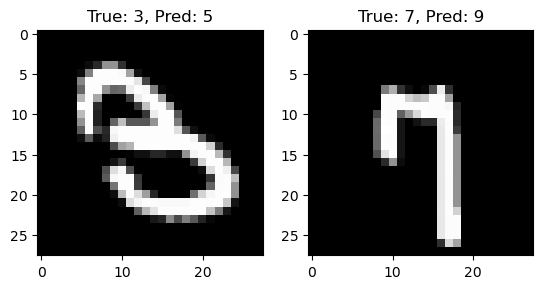

In [35]:
pred_labels = np.argmax(pred, axis=1)
wrong_indices = np.where(pred_labels != test_y_100)[0][:2]
print("오류나는 인덱스:", wrong_indices)

for i, idx in enumerate(wrong_indices):
    plt.subplot(1, 2, i + 1)
    plt.imshow(test_x_100[idx, :, :, 0], 'gray')
    plt.title(f"True: {test_y_100[idx]}, Pred: {pred_labels[idx]}")
plt.show()

In [37]:
pred_result = np.argmax(pred, axis=1)

In [42]:
pred_result, test_y_100
pred_result != test_y_100

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])